<a href="https://colab.research.google.com/github/NaYunJeong/K-Digital-Training-Class/blob/main/Aug08_3_SVM_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
col_name = list(cancer.feature_names)
col_name.append('target') # target열 추가
col_name

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [4]:
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_name)  # np.c (concat과 같음 => 각 열들을 연결할 때 사용)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [7]:
df.columns   # mean (평균), error(표준 오차), worst(각 특성별 가장 큰 3개의 값의 평균)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

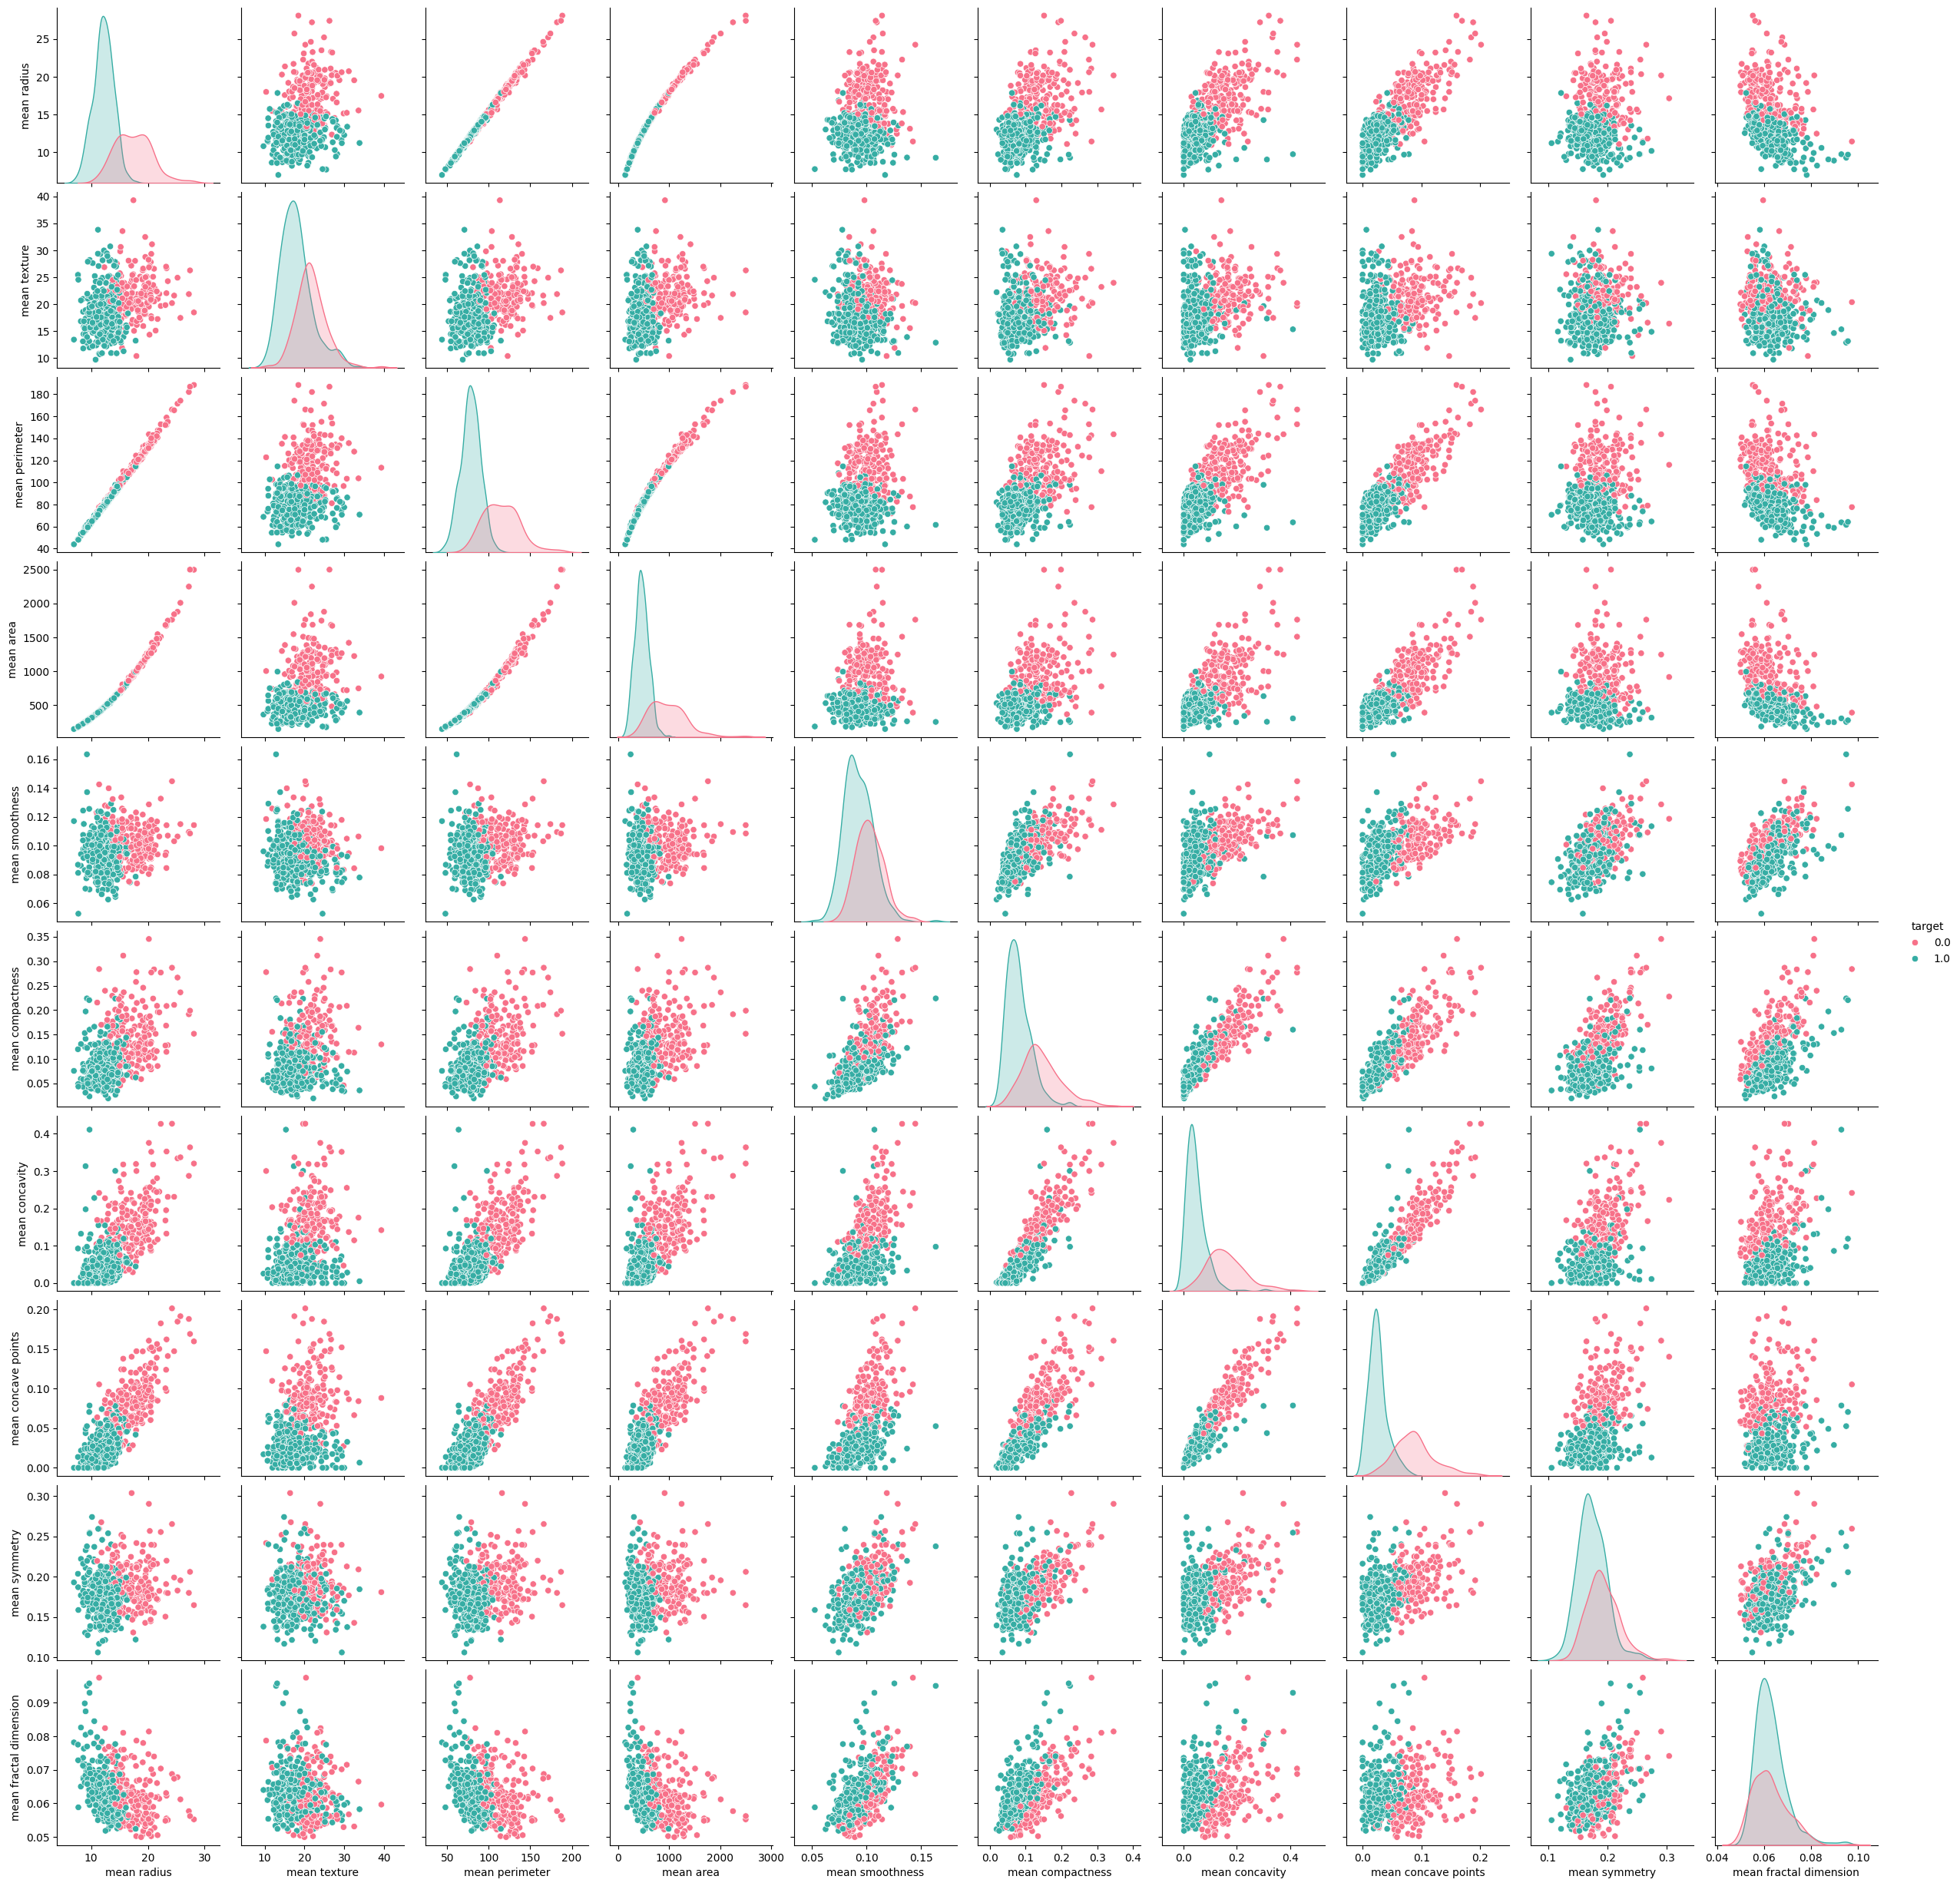

In [8]:
# mean 변수로 pairplot 만들기
#   pairplot : data에 들어있는 각각의 열(column)들의 모든 상관관계를 출력
sns.pairplot(df, hue='target', palette='husl',
             vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'])

<Axes: >

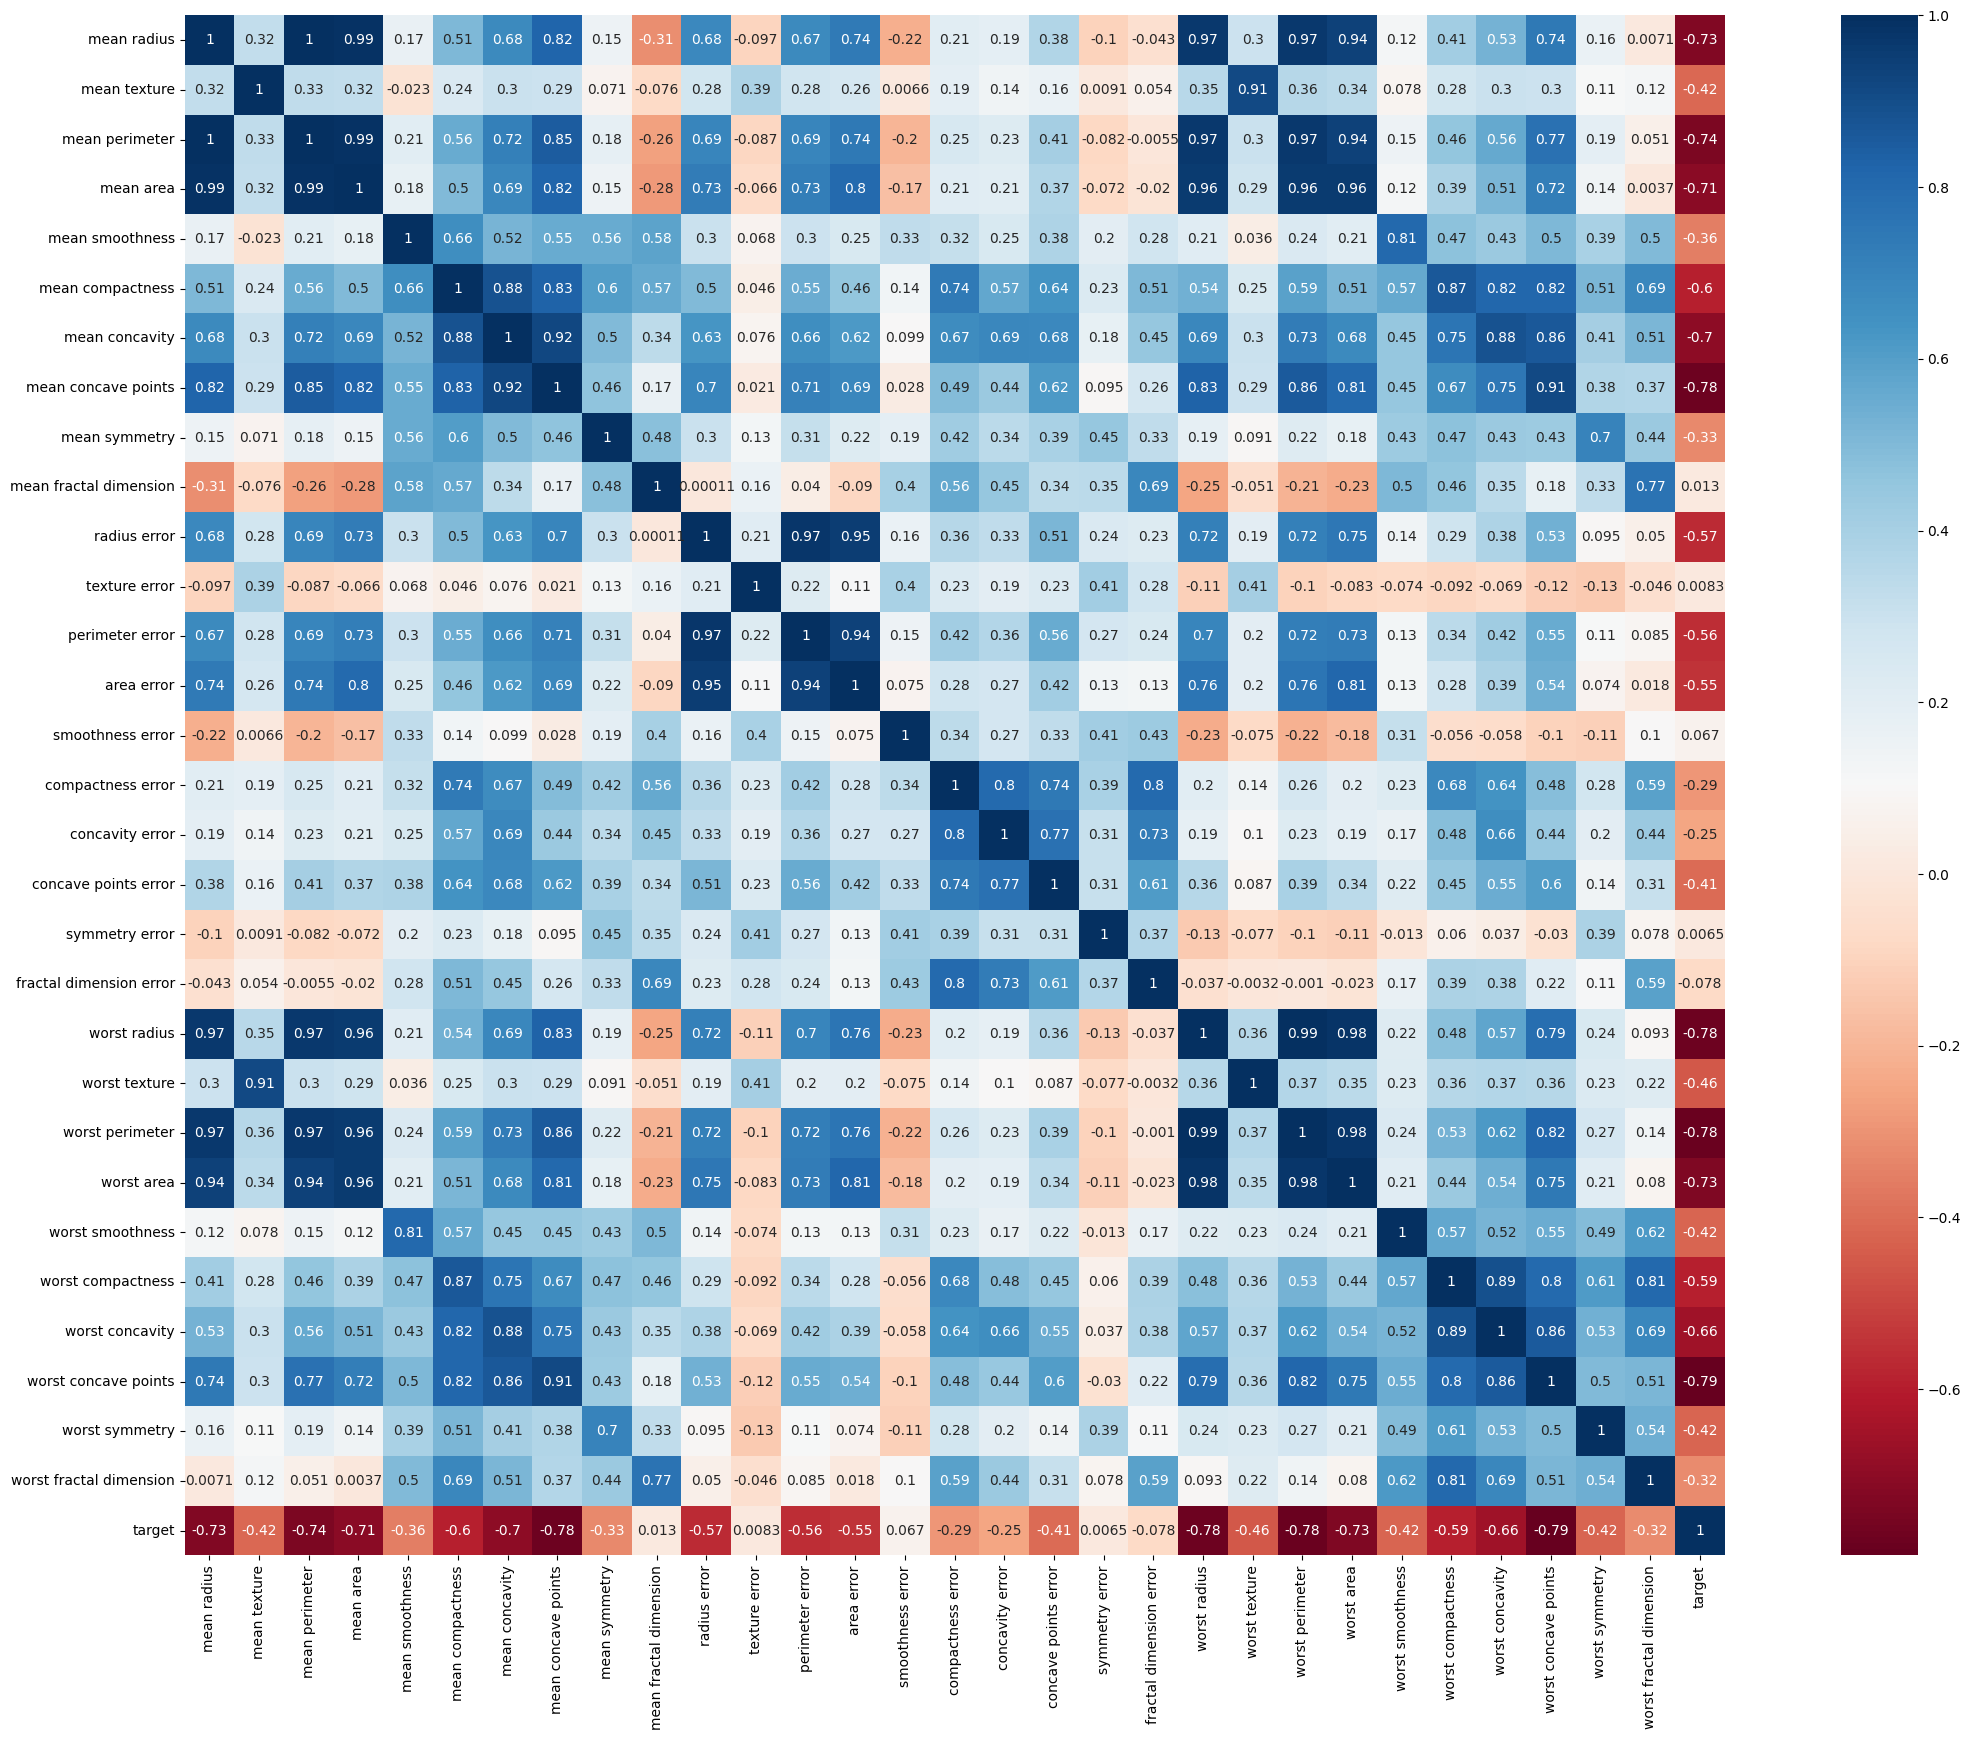

In [9]:
# heatmap
#   데이터들의 배열을 색상으로 표현한 것
#    두 변수간의 값의 변화를 한눈에 알 수 있음
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True, square=True, cmap='RdBu')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [14]:
# target : 0 / 1
#   0 : 양성 / 1 : 음성

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

# 학습시키기
m = SVC().fit(x_train, y_train)

 # 모델평가
trainScore = m.score(x_train, y_train)
testScore = m.score(x_test, y_test)

print(trainScore, testScore)

0.92018779342723 0.9230769230769231


Text(0, 0.5, 'scale')

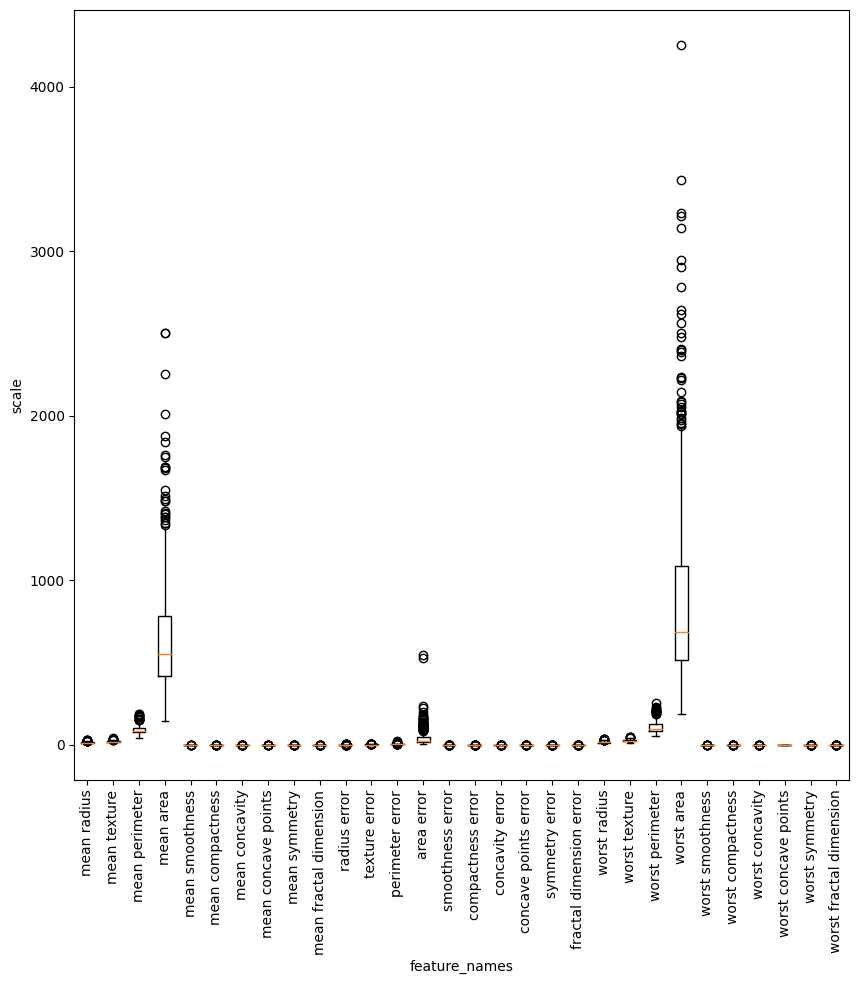

In [17]:
fig = plt.figure(figsize=[10, 10])
plt.boxplot(cancer.data)
plt.xticks(np.arange(30) + 1, cancer.feature_names, rotation=90)
plt.xlabel('feature_names')
plt.ylabel('scale')

# Boxplot - 기초 통계량을 한눈에 알아볼 수 있다는 장점
# 그래프 선의 제일 아래 - : 최소값
# 박스 기준 제일 아래 : 1사분위(25%)
# 박스 안의 주황색 선 : 2사분위(중앙값, 50%)
# 박스 기준 제일 위 : 3사분위(75%)
# 그래프 선의 제일 위 - : 최대값
# 나머지 0 부분 : 이상치(비정상적으로 극단적인 값을 갖는 경우)

SVM은 scale(수치)에 상당히 민감함

SVM은 반드시 적용 전에 정규화(Normalization)가 꼭 필요함 !

In [18]:
# 0과 1사이에 값을 균등하게 조정해서 넣기

xMax = x_train.max(axis=0)
xMin = x_train.min(axis=0)
print(xMax, xMin)

# 정규화 식 = (측정값 - 최소값) / (최대값 - 최소값)
x_train_sik = (x_train - xMin) / (xMax - xMin)
x_test_sik = (x_test - xMin) / (xMax - xMin)

[2.811e+01 3.381e+01 1.885e+02 2.499e+03 1.634e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.256e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.313e+01
 4.954e+01 2.293e+02 3.432e+03 2.226e-01 9.327e-01 1.252e+00 2.910e-01
 6.638e-01 1.730e-01] [7.729e+00 9.710e+00 4.792e+01 1.788e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 8.952e+00
 1.202e+01 5.665e+01 2.401e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]


{'whiskers': [<matplotlib.lines.Line2D at 0x7c7c09a198a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c7c09a19b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c7c09a198d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c7c09a181c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c7c09a1a7a0>,
 'means': []}

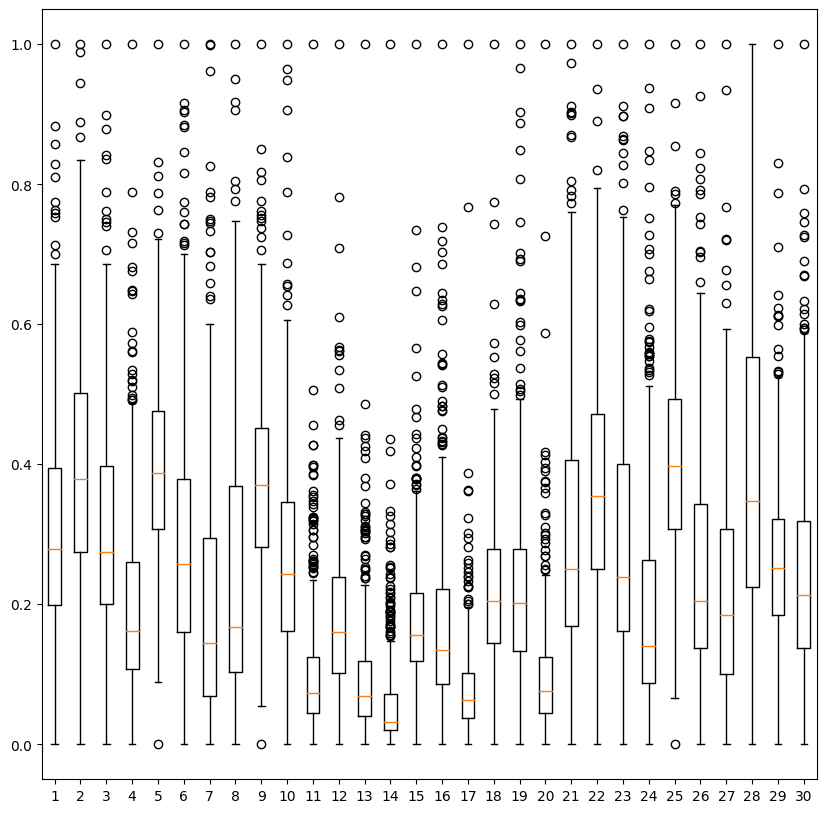

In [19]:
fig = plt.figure(figsize=[10, 10])
plt.boxplot(x_train_sik)

In [21]:
# 표준화(Standardization)
# 데이터를 0을 중심으로 양쪽으로 데이터를 분산시키는 방법
# 표준화 식 = (측정값 - 평균) / 표준편차

xMean = x_train.mean(axis=0) # x_train의 평균
xStd = x_train.std(axis=0)  # x_train의 표준편차

x_train_s = (x_train - xMean) / xStd
x_test_s = (x_test - xMean) / xStd

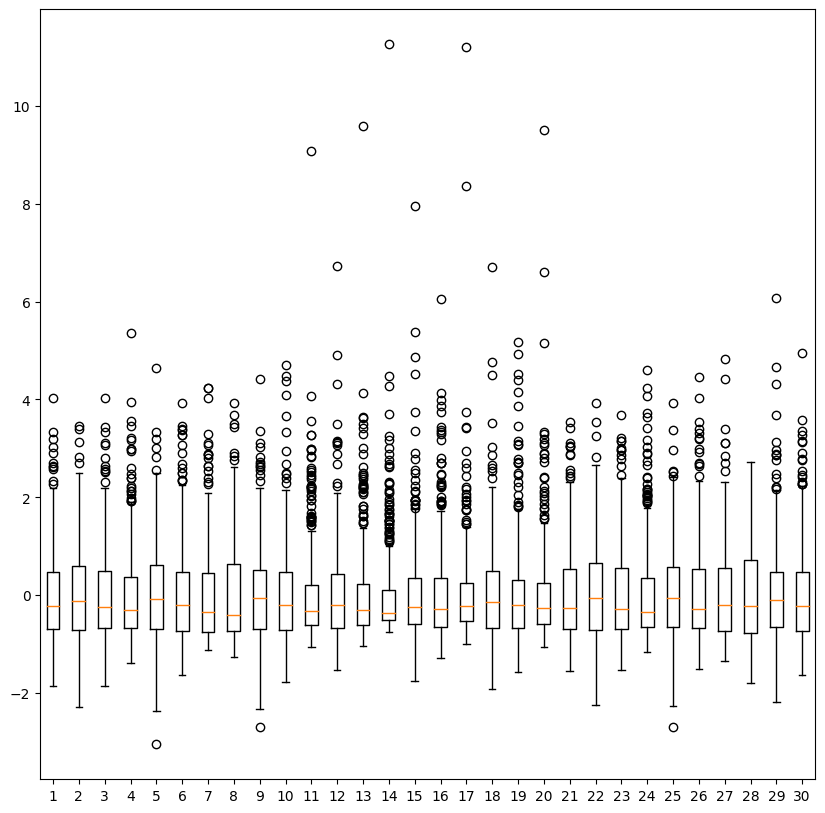

In [22]:
fig = plt.figure(figsize=[10, 10])
plt.boxplot(x_train_s)
print('')

In [24]:
# 모델 학습시켜서 모델 평가 시키기
m = SVC().fit(x_train_s, y_train)

trainScore = m.score(x_train_s, y_train)
testScore = m.score(x_test_s, y_test)

print(trainScore, testScore)

0.9882629107981221 0.9790209790209791


In [25]:
predict = m.predict(x_test_s)
print(y_test)
print()
print(predict)

[0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1]

[0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1]


In [27]:
# test의 정답지와 test의 시험지 예측값이 서로 맞지 않는 것을 찾아보자!
np.where(y_test != predict)

(array([ 72,  94, 108]),)